In [3]:
import numpy as np
import pylab as plt
import h5py
import fitsio
import healpy as hp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import healsparse as hsp
import skyproj
from scipy import stats

In [4]:
plt.rcParams["axes.linewidth"]  = 2.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = 'False'
plt.rcParams['figure.figsize'] = [10, 10]
# plt.rc("text", usetex=True)
plt.rc("font", size=18)


COLORS = ["f07167","219ebc","c767ac","ffba0a","59a270"]
COLORS = ['#' + c if c[0] != '#' else c for c in COLORS ]

from cycler import cycler

# Update the default prop_cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=COLORS)

# Get the Data mask

In [5]:
with h5py.File('/project/chihway/data/decade/metacal_gold_combined_mask_20240209.hdf', 'r') as f:
    
    mask = f['baseline_mcal_mask_noshear'][::] > 0
    
with h5py.File('/project/chihway/data/decade/metacal_gold_combined_20240209.hdf', 'r') as f:
    
    ra = f['RA'][::][mask]
    dec = f['DEC'][::][mask]
    
NSIDE = 128
pix = hp.ang2pix(NSIDE, ra, dec, lonlat = True)
Map = np.bincount(pix, minlength = hp.nside2npix(NSIDE)).astype(float)

# Plot some maps first

In [7]:
#Check available map types
!ls /project/kadrlica/secco/DELVE/combined_dr311+dr312/

airmass   dcr_e2		     maglim	    sum_intersection_gr.hsp
coverage  dr3_1_1_query_Nov28th.csv  nexp	    sum_intersection_iz.hsp
dcr_ddec  dr3_1_2_query_Nov28th.csv  skybrite
dcr_dra   exptime		     skysigma
dcr_e1	  fwhm			     sum_final.hsp


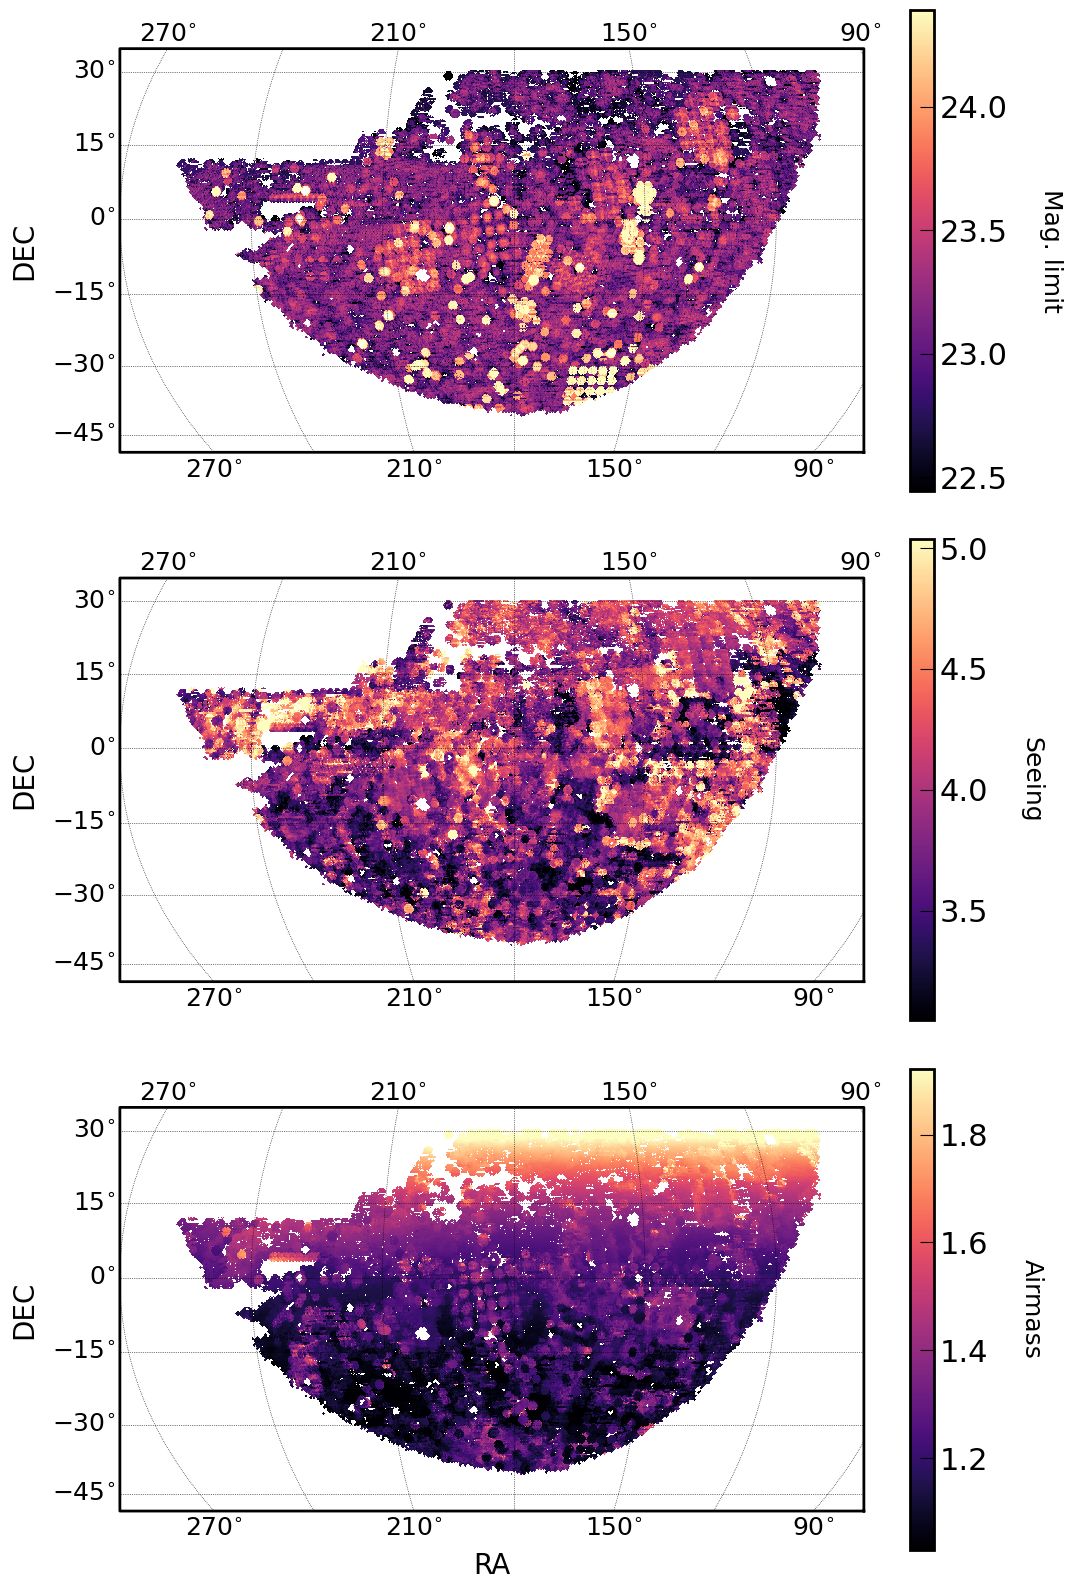

In [14]:
fig, ax = plt.subplots(3, 1, figsize = (12,20), sharex = True, sharey = True)
plt.subplots_adjust(hspace = 0.1)

maps  = ['maglim', 'fwhm', 'airmass']
for a, m in zip(ax.flat, maps):

    p = f'/project/kadrlica/secco/DELVE/combined_dr311+dr312/{m}/delve_dr311+dr312_i_{m}_Nov28th.hsp'
    
    X  = hsp.HealSparseMap.read(p)
    RA, DEC = X.valid_pixels_pos()
    mask = Map[hp.ang2pix(NSIDE, RA, DEC, lonlat = True)] == 0
    X.update_values_pix(X.valid_pixels[mask], hp.UNSEEN, nest = True)
    sp = skyproj.McBrydeSkyproj(ax = a, lon_0 = 180, extent = [100, 270, -49, 35])
    
    im = sp.draw_hspmap(X, cmap = 'magma', zoom = False, rasterized = True,)

    if m == 'fwhm': m = 'seeing'
    if m == 'maglim': m = 'Mag. limit'
    
    c = sp.draw_colorbar(pad = 0.05, fontsize = 22)
    c.set_label(label = m.capitalize(), rotation = 270, labelpad = 40)

    sp.set_ylabel('DEC', size = 20, pad = 10)
    sp.set_xlabel('')
    
    
sp.set_xlabel('RA', size = 20, pad = 10)
plt.savefig('./SysMaps.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

# Now do the linear regression of all systematics

In [15]:
import sys

sys.path.append('/home/dhayaa/DECADE/shearcat/shear_tests')

from SysmapTestRunner import SysmapTestRunner

In [16]:
RUN = SysmapTestRunner(NSIDE = 128, 
                       data_path = '/project/chihway/data/decade/metacal_gold_combined_20240209.hdf',)

In [11]:
maps = ['airmass', 'dcr_e1', 'dcr_e2', 'dcr_ddec', 'dcr_dra', 'maglim',  'exptime', 'fwhm', 'skysigma', 'skybrite', 'nexp']
bands = ['r', 'i', 'z']

In [86]:
res = RUN.go(maps, bands)

Function get_data_maps took 67.813 seconds to run.
FINISHED LOADING MASKS
FINISHED LOADING PIX
FINISHED LOADING SHEAR
Function _pix_avg took 0.99486 seconds to run.
Function _pix_avg took 0.99297 seconds to run.
Function _pix_avg took 0.99194 seconds to run.
Function _pix_avg took 0.99783 seconds to run.
Function _pix_avg took 0.98971 seconds to run.
Function _pix_avg took 0.99103 seconds to run.
Function _pix_avg took 0.98946 seconds to run.
Function _pix_avg took 0.99158 seconds to run.
Function get_response_maps took 145.15 seconds to run.


/home/dhayaa/DECADE/shearcat/shear_tests/SysmapTestRunner.py:162: RuntimeWarning: invalid value encountered in divide
  g1 = g1/R11
/home/dhayaa/DECADE/shearcat/shear_tests/SysmapTestRunner.py:163: RuntimeWarning: invalid value encountered in divide
  g2 = g2/R22


Function assign_patches took 1.1844 seconds to run.
Function assign_patches took 0.20759 seconds to run.


  0%|          | 0/9900 [00:00<?, ?it/s]

Function get_sys_map took 10.112 seconds to run.


  0%|          | 1/9900 [00:10<28:41:21, 10.43s/it]

Function assign_patches took 0.21587 seconds to run.


  1%|          | 99/9900 [00:17<12:33, 13.00it/s]  

Function get_sys_map took 10.046 seconds to run.


  1%|          | 101/9900 [00:28<4:23:58,  1.62s/it]

Function assign_patches took 0.21312 seconds to run.


  2%|▏         | 199/9900 [00:35<12:26, 12.99it/s]  

Function get_sys_map took 11.076 seconds to run.


  2%|▏         | 201/9900 [00:47<4:46:17,  1.77s/it]

Function assign_patches took 0.21132 seconds to run.


  3%|▎         | 299/9900 [00:54<12:06, 13.21it/s]  

Function get_sys_map took 10.186 seconds to run.


  3%|▎         | 301/9900 [01:05<4:22:25,  1.64s/it]

Function assign_patches took 0.2183 seconds to run.


  4%|▍         | 399/9900 [01:14<14:22, 11.02it/s]  

Function get_sys_map took 10.371 seconds to run.


  4%|▍         | 401/9900 [01:25<4:25:40,  1.68s/it]

Function assign_patches took 0.21488 seconds to run.


  5%|▌         | 499/9900 [01:32<12:00, 13.05it/s]  

Function get_sys_map took 10.242 seconds to run.


  5%|▌         | 501/9900 [01:43<4:17:52,  1.65s/it]

Function assign_patches took 0.21648 seconds to run.


  6%|▌         | 599/9900 [01:51<11:51, 13.07it/s]  

Function get_sys_map took 10.234 seconds to run.


  6%|▌         | 601/9900 [02:01<4:14:53,  1.64s/it]

Function assign_patches took 0.21433 seconds to run.


  7%|▋         | 699/9900 [02:09<12:06, 12.67it/s]  

Function get_sys_map took 10.251 seconds to run.


  7%|▋         | 701/9900 [02:20<4:12:56,  1.65s/it]

Function assign_patches took 0.21747 seconds to run.


  8%|▊         | 799/9900 [02:27<11:38, 13.04it/s]  

Function get_sys_map took 10.369 seconds to run.


  8%|▊         | 801/9900 [02:38<4:13:15,  1.67s/it]

Function assign_patches took 0.22977 seconds to run.


  9%|▉         | 899/9900 [02:46<12:02, 12.46it/s]  

Function get_sys_map took 10.365 seconds to run.


  9%|▉         | 901/9900 [02:57<4:10:18,  1.67s/it]

Function assign_patches took 0.22481 seconds to run.


 10%|█         | 999/9900 [03:04<11:32, 12.86it/s]  

Function get_sys_map took 8.098 seconds to run.


 10%|█         | 1001/9900 [03:13<3:16:33,  1.33s/it]

Function assign_patches took 0.21497 seconds to run.


 11%|█         | 1099/9900 [03:21<11:05, 13.22it/s]  

Function get_sys_map took 10.129 seconds to run.


 11%|█         | 1101/9900 [03:31<3:59:35,  1.63s/it]

Function assign_patches took 0.23141 seconds to run.


 12%|█▏        | 1199/9900 [03:40<12:13, 11.87it/s]  

Function get_sys_map took 10.386 seconds to run.


 12%|█▏        | 1201/9900 [03:51<4:04:50,  1.69s/it]

Function assign_patches took 0.30087 seconds to run.


 13%|█▎        | 1299/9900 [04:00<13:18, 10.77it/s]  

Function get_sys_map took 10.161 seconds to run.


 13%|█▎        | 1301/9900 [04:10<3:56:41,  1.65s/it]

Function assign_patches took 0.21967 seconds to run.


 14%|█▍        | 1399/9900 [04:18<10:52, 13.04it/s]  

Function get_sys_map took 10.252 seconds to run.


 14%|█▍        | 1401/9900 [04:29<3:53:41,  1.65s/it]

Function assign_patches took 0.2274 seconds to run.


 15%|█▌        | 1500/9900 [04:46<10:47, 12.96it/s]  

Function get_sys_map took 10.219 seconds to run.


 15%|█▌        | 1501/9900 [04:47<3:52:21,  1.66s/it]

Function assign_patches took 0.32727 seconds to run.


 16%|█▌        | 1599/9900 [04:55<10:49, 12.78it/s]  

Function get_sys_map took 10.766 seconds to run.


 16%|█▌        | 1601/9900 [05:07<3:59:03,  1.73s/it]

Function assign_patches took 0.21581 seconds to run.


 17%|█▋        | 1699/9900 [05:15<10:44, 12.72it/s]  

Function get_sys_map took 10.418 seconds to run.


 17%|█▋        | 1701/9900 [05:26<3:49:01,  1.68s/it]

Function assign_patches took 0.22683 seconds to run.


 18%|█▊        | 1799/9900 [05:33<10:17, 13.11it/s]  

Function get_sys_map took 10.173 seconds to run.


 18%|█▊        | 1801/9900 [05:44<3:42:30,  1.65s/it]

Function assign_patches took 0.30142 seconds to run.


 19%|█▉        | 1899/9900 [05:51<10:08, 13.15it/s]  

Function get_sys_map took 10.141 seconds to run.


 19%|█▉        | 1901/9900 [06:02<3:37:28,  1.63s/it]

Function assign_patches took 0.21946 seconds to run.


 20%|██        | 1999/9900 [06:10<10:01, 13.13it/s]  

Function get_sys_map took 10.169 seconds to run.


 20%|██        | 2001/9900 [06:20<3:35:08,  1.63s/it]

Function assign_patches took 0.21267 seconds to run.


 21%|██        | 2099/9900 [06:28<09:53, 13.14it/s]  

Function get_sys_map took 8.1016 seconds to run.


 21%|██        | 2101/9900 [06:36<2:52:07,  1.32s/it]

Function assign_patches took 0.21392 seconds to run.


 22%|██▏       | 2199/9900 [06:44<10:03, 12.76it/s]  

Function get_sys_map took 10.209 seconds to run.


 22%|██▏       | 2201/9900 [06:54<3:30:39,  1.64s/it]

Function assign_patches took 0.21057 seconds to run.


 23%|██▎       | 2299/9900 [07:02<09:54, 12.78it/s]  

Function get_sys_map took 10.203 seconds to run.


 23%|██▎       | 2301/9900 [07:13<3:27:50,  1.64s/it]

Function assign_patches took 0.21256 seconds to run.


 24%|██▍       | 2399/9900 [07:20<09:47, 12.77it/s]  

Function get_sys_map took 10.225 seconds to run.


 24%|██▍       | 2401/9900 [07:31<3:25:31,  1.64s/it]

Function assign_patches took 0.21059 seconds to run.


 25%|██▌       | 2499/9900 [07:38<09:23, 13.14it/s]  

Function get_sys_map took 10.221 seconds to run.


 25%|██▌       | 2501/9900 [07:49<3:22:28,  1.64s/it]

Function assign_patches took 0.21198 seconds to run.


 26%|██▋       | 2599/9900 [07:57<09:32, 12.75it/s]  

Function get_sys_map took 10.228 seconds to run.


 26%|██▋       | 2601/9900 [08:07<3:20:11,  1.65s/it]

Function assign_patches took 0.21616 seconds to run.


 27%|██▋       | 2699/9900 [08:15<09:23, 12.77it/s]  

Function get_sys_map took 10.218 seconds to run.


 27%|██▋       | 2701/9900 [08:26<3:17:11,  1.64s/it]

Function assign_patches took 0.21328 seconds to run.


 28%|██▊       | 2799/9900 [08:33<09:00, 13.13it/s]  

Function get_sys_map took 10.234 seconds to run.


 28%|██▊       | 2801/9900 [08:44<3:14:50,  1.65s/it]

Function assign_patches took 0.23063 seconds to run.


 29%|██▉       | 2899/9900 [08:51<09:07, 12.80it/s]  

Function get_sys_map took 10.224 seconds to run.


 29%|██▉       | 2901/9900 [09:02<3:12:54,  1.65s/it]

Function assign_patches took 0.25381 seconds to run.


 30%|███       | 2999/9900 [09:10<08:58, 12.83it/s]  

Function get_sys_map took 10.393 seconds to run.


 30%|███       | 3001/9900 [09:21<3:12:13,  1.67s/it]

Function assign_patches took 0.22589 seconds to run.


 31%|███▏      | 3099/9900 [09:29<09:02, 12.53it/s]  

Function get_sys_map took 10.371 seconds to run.


 31%|███▏      | 3101/9900 [09:40<3:09:28,  1.67s/it]

Function assign_patches took 0.22122 seconds to run.


 32%|███▏      | 3199/9900 [09:48<09:11, 12.15it/s]  

Function get_sys_map took 8.2799 seconds to run.


 32%|███▏      | 3201/9900 [09:57<2:32:19,  1.36s/it]

Function assign_patches took 0.23355 seconds to run.


 33%|███▎      | 3299/9900 [10:05<08:44, 12.57it/s]  

Function get_sys_map took 10.396 seconds to run.


 33%|███▎      | 3301/9900 [10:16<3:04:30,  1.68s/it]

Function assign_patches took 0.22138 seconds to run.


 34%|███▍      | 3399/9900 [10:25<09:56, 10.91it/s]  

Function get_sys_map took 10.379 seconds to run.


 34%|███▍      | 3401/9900 [10:36<3:02:48,  1.69s/it]

Function assign_patches took 0.22826 seconds to run.


 35%|███▌      | 3499/9900 [10:44<08:26, 12.64it/s]  

Function get_sys_map took 10.384 seconds to run.


 35%|███▌      | 3501/9900 [10:54<2:58:06,  1.67s/it]

Function assign_patches took 0.21736 seconds to run.


 36%|███▋      | 3599/9900 [11:02<08:06, 12.96it/s]  

Function get_sys_map took 10.372 seconds to run.


 36%|███▋      | 3601/9900 [11:13<2:55:22,  1.67s/it]

Function assign_patches took 0.22366 seconds to run.


 37%|███▋      | 3699/9900 [11:21<07:54, 13.07it/s]  

Function get_sys_map took 10.163 seconds to run.


 37%|███▋      | 3701/9900 [11:31<2:48:59,  1.64s/it]

Function assign_patches took 0.2233 seconds to run.


 38%|███▊      | 3799/9900 [11:40<07:42, 13.20it/s]  

Function get_sys_map took 10.314 seconds to run.


 38%|███▊      | 3801/9900 [11:50<2:48:56,  1.66s/it]

Function assign_patches took 0.23284 seconds to run.


 39%|███▉      | 3899/9900 [11:58<07:49, 12.78it/s]  

Function get_sys_map took 10.446 seconds to run.


 39%|███▉      | 3901/9900 [12:09<2:47:54,  1.68s/it]

Function assign_patches took 0.22346 seconds to run.


 40%|████      | 3999/9900 [12:17<07:34, 12.98it/s]  

Function get_sys_map took 10.351 seconds to run.


 40%|████      | 4001/9900 [12:28<2:43:37,  1.66s/it]

Function assign_patches took 0.22337 seconds to run.


 41%|████▏     | 4099/9900 [12:35<07:39, 12.62it/s]  

Function get_sys_map took 10.412 seconds to run.


 41%|████▏     | 4101/9900 [12:46<2:42:06,  1.68s/it]

Function assign_patches took 0.23748 seconds to run.


 42%|████▏     | 4199/9900 [12:54<07:31, 12.63it/s]  

Function get_sys_map took 10.383 seconds to run.


 42%|████▏     | 4201/9900 [13:05<2:38:33,  1.67s/it]

Function assign_patches took 0.21345 seconds to run.


 43%|████▎     | 4299/9900 [13:12<07:23, 12.63it/s]  

Function get_sys_map took 8.3012 seconds to run.


 43%|████▎     | 4301/9900 [13:21<2:06:42,  1.36s/it]

Function assign_patches took 0.21853 seconds to run.


 44%|████▍     | 4399/9900 [13:29<07:15, 12.62it/s]  

Function get_sys_map took 10.373 seconds to run.


 44%|████▍     | 4401/9900 [13:40<2:32:51,  1.67s/it]

Function assign_patches took 0.21399 seconds to run.


 45%|████▌     | 4499/9900 [13:47<07:07, 12.64it/s]  

Function get_sys_map took 10.407 seconds to run.


 45%|████▌     | 4501/9900 [13:58<2:30:32,  1.67s/it]

Function assign_patches took 0.21332 seconds to run.


 46%|████▋     | 4599/9900 [14:06<07:00, 12.62it/s]  

Function get_sys_map took 10.448 seconds to run.


 46%|████▋     | 4601/9900 [14:17<2:28:43,  1.68s/it]

Function assign_patches took 0.23288 seconds to run.


 47%|████▋     | 4699/9900 [14:26<07:47, 11.12it/s]  

Function get_sys_map took 10.104 seconds to run.


 47%|████▋     | 4701/9900 [14:36<2:22:17,  1.64s/it]

Function assign_patches took 0.23201 seconds to run.


 48%|████▊     | 4799/9900 [14:45<08:24, 10.11it/s]  

Function get_sys_map took 10.424 seconds to run.


 48%|████▊     | 4801/9900 [14:56<2:24:58,  1.71s/it]

Function assign_patches took 0.24183 seconds to run.


 49%|████▉     | 4899/9900 [15:05<08:11, 10.18it/s]  

Function get_sys_map took 10.44 seconds to run.


 50%|████▉     | 4901/9900 [15:16<2:22:31,  1.71s/it]

Function assign_patches took 0.28511 seconds to run.


 50%|█████     | 4999/9900 [15:24<06:31, 12.53it/s]  

Function get_sys_map took 10.351 seconds to run.


 51%|█████     | 5001/9900 [15:34<2:15:57,  1.67s/it]

Function assign_patches took 0.21502 seconds to run.


 52%|█████▏    | 5099/9900 [15:42<06:10, 12.97it/s]  

Function get_sys_map took 10.353 seconds to run.


 52%|█████▏    | 5101/9900 [15:53<2:13:07,  1.66s/it]

Function assign_patches took 0.22202 seconds to run.


 53%|█████▎    | 5199/9900 [16:01<06:12, 12.60it/s]  

Function get_sys_map took 10.393 seconds to run.


 53%|█████▎    | 5201/9900 [16:11<2:10:56,  1.67s/it]

Function assign_patches took 0.22058 seconds to run.


 54%|█████▎    | 5299/9900 [16:19<06:04, 12.63it/s]  

Function get_sys_map took 10.38 seconds to run.


 54%|█████▎    | 5301/9900 [16:30<2:07:59,  1.67s/it]

Function assign_patches took 0.2206 seconds to run.


 55%|█████▍    | 5399/9900 [16:38<05:47, 12.96it/s]  

Function get_sys_map took 8.2803 seconds to run.


 55%|█████▍    | 5401/9900 [16:46<1:41:43,  1.36s/it]

Function assign_patches took 0.22179 seconds to run.


 56%|█████▌    | 5499/9900 [16:56<07:04, 10.37it/s]  

Function get_sys_map took 10.283 seconds to run.


 56%|█████▌    | 5501/9900 [17:06<2:02:52,  1.68s/it]

Function assign_patches took 0.2203 seconds to run.


 57%|█████▋    | 5599/9900 [17:15<05:29, 13.06it/s]  

Function get_sys_map took 10.315 seconds to run.


 57%|█████▋    | 5601/9900 [17:26<1:58:54,  1.66s/it]

Function assign_patches took 0.23193 seconds to run.


 58%|█████▊    | 5699/9900 [17:34<05:29, 12.76it/s]  

Function get_sys_map took 10.278 seconds to run.


 58%|█████▊    | 5701/9900 [17:44<1:55:45,  1.65s/it]

Function assign_patches took 0.22292 seconds to run.


 59%|█████▊    | 5799/9900 [17:52<05:12, 13.12it/s]  

Function get_sys_map took 10.269 seconds to run.


 59%|█████▊    | 5801/9900 [18:02<1:52:39,  1.65s/it]

Function assign_patches took 0.21138 seconds to run.


 60%|█████▉    | 5899/9900 [18:10<05:12, 12.79it/s]  

Function get_sys_map took 10.293 seconds to run.


 60%|█████▉    | 5901/9900 [18:21<1:50:20,  1.66s/it]

Function assign_patches took 0.21849 seconds to run.


 61%|██████    | 5999/9900 [18:28<05:05, 12.76it/s]  

Function get_sys_map took 10.295 seconds to run.


 61%|██████    | 6001/9900 [18:39<1:48:11,  1.66s/it]

Function assign_patches took 0.27859 seconds to run.


 62%|██████▏   | 6099/9900 [18:47<04:58, 12.75it/s]  

Function get_sys_map took 10.267 seconds to run.


 62%|██████▏   | 6101/9900 [18:58<1:44:43,  1.65s/it]

Function assign_patches took 0.23275 seconds to run.


 63%|██████▎   | 6199/9900 [19:05<04:41, 13.15it/s]  

Function get_sys_map took 10.259 seconds to run.


 63%|██████▎   | 6201/9900 [19:16<1:41:41,  1.65s/it]

Function assign_patches took 0.22466 seconds to run.


 64%|██████▎   | 6299/9900 [19:23<04:41, 12.79it/s]  

Function get_sys_map took 10.302 seconds to run.


 64%|██████▎   | 6301/9900 [19:34<1:39:19,  1.66s/it]

Function assign_patches took 0.21007 seconds to run.


 65%|██████▍   | 6399/9900 [19:42<04:34, 12.76it/s]  

Function get_sys_map took 10.288 seconds to run.


 65%|██████▍   | 6401/9900 [19:52<1:36:35,  1.66s/it]

Function assign_patches took 0.22823 seconds to run.


 66%|██████▌   | 6499/9900 [20:00<04:26, 12.76it/s]  

Function get_sys_map took 8.181 seconds to run.


 66%|██████▌   | 6501/9900 [20:09<1:15:49,  1.34s/it]

Function assign_patches took 0.21657 seconds to run.


 67%|██████▋   | 6599/9900 [20:16<04:11, 13.15it/s]  

Function get_sys_map took 10.258 seconds to run.


 67%|██████▋   | 6601/9900 [20:27<1:30:39,  1.65s/it]

Function assign_patches took 0.22157 seconds to run.


 68%|██████▊   | 6699/9900 [20:34<04:03, 13.14it/s]  

Function get_sys_map took 10.223 seconds to run.


 68%|██████▊   | 6701/9900 [20:45<1:27:59,  1.65s/it]

Function assign_patches took 0.26581 seconds to run.


 69%|██████▊   | 6799/9900 [20:53<03:55, 13.15it/s]  

Function get_sys_map took 10.254 seconds to run.


 69%|██████▊   | 6801/9900 [21:03<1:25:19,  1.65s/it]

Function assign_patches took 0.22384 seconds to run.


 70%|██████▉   | 6899/9900 [21:11<03:59, 12.54it/s]  

Function get_sys_map took 10.417 seconds to run.


 70%|██████▉   | 6901/9900 [21:22<1:23:48,  1.68s/it]

Function assign_patches took 0.22654 seconds to run.


 71%|███████   | 6999/9900 [21:30<03:54, 12.36it/s]  

Function get_sys_map took 10.397 seconds to run.


 71%|███████   | 7001/9900 [21:41<1:20:49,  1.67s/it]

Function assign_patches took 0.21694 seconds to run.


 72%|███████▏  | 7099/9900 [21:48<03:36, 12.91it/s]  

Function get_sys_map took 10.644 seconds to run.


 72%|███████▏  | 7101/9900 [21:59<1:19:55,  1.71s/it]

Function assign_patches took 0.23747 seconds to run.


 73%|███████▎  | 7200/9900 [22:08<03:42, 12.13it/s]  

Function get_sys_map took 10.283 seconds to run.


 73%|███████▎  | 7202/9900 [22:19<1:14:35,  1.66s/it]

Function assign_patches took 0.22918 seconds to run.


 74%|███████▎  | 7300/9900 [22:26<03:23, 12.80it/s]  

Function get_sys_map took 10.189 seconds to run.


 74%|███████▍  | 7302/9900 [22:37<1:11:16,  1.65s/it]

Function assign_patches took 0.25977 seconds to run.


 75%|███████▍  | 7400/9900 [22:44<03:10, 13.16it/s]  

Function get_sys_map took 10.191 seconds to run.


 75%|███████▍  | 7402/9900 [22:55<1:08:18,  1.64s/it]

Function assign_patches took 0.21798 seconds to run.


 76%|███████▌  | 7500/9900 [23:02<03:01, 13.20it/s]  

Function get_sys_map took 10.159 seconds to run.


 76%|███████▌  | 7502/9900 [23:13<1:05:28,  1.64s/it]

Function assign_patches took 0.2454 seconds to run.


 77%|███████▋  | 7600/9900 [23:21<02:58, 12.86it/s]  

Function get_sys_map took 8.0762 seconds to run.


 77%|███████▋  | 7602/9900 [23:29<50:53,  1.33s/it]

Function assign_patches took 0.22033 seconds to run.


 78%|███████▊  | 7700/9900 [23:37<02:50, 12.88it/s]

Function get_sys_map took 10.348 seconds to run.


 78%|███████▊  | 7702/9900 [23:48<1:00:59,  1.67s/it]

Function assign_patches took 0.22483 seconds to run.


 79%|███████▉  | 7800/9900 [23:56<02:47, 12.56it/s]  

Function get_sys_map took 10.366 seconds to run.


 79%|███████▉  | 7802/9900 [24:07<58:23,  1.67s/it]

Function assign_patches took 0.21701 seconds to run.


 80%|███████▉  | 7900/9900 [24:14<02:35, 12.89it/s]

Function get_sys_map took 10.22 seconds to run.


 80%|███████▉  | 7902/9900 [24:25<54:44,  1.64s/it]

Function assign_patches took 0.21339 seconds to run.


 81%|████████  | 8000/9900 [24:32<02:24, 13.15it/s]

Function get_sys_map took 10.213 seconds to run.


 81%|████████  | 8002/9900 [24:43<52:13,  1.65s/it]

Function assign_patches took 0.26446 seconds to run.


 82%|████████▏ | 8100/9900 [24:51<02:19, 12.88it/s]

Function get_sys_map took 10.377 seconds to run.


 82%|████████▏ | 8102/9900 [25:01<50:10,  1.67s/it]

Function assign_patches took 0.22513 seconds to run.


 83%|████████▎ | 8200/9900 [25:10<02:24, 11.79it/s]

Function get_sys_map took 10.228 seconds to run.


 83%|████████▎ | 8202/9900 [25:21<46:41,  1.65s/it]

Function assign_patches took 0.21337 seconds to run.


 84%|████████▍ | 8300/9900 [25:28<02:05, 12.74it/s]

Function get_sys_map took 10.364 seconds to run.


 84%|████████▍ | 8302/9900 [25:39<44:22,  1.67s/it]

Function assign_patches took 0.21362 seconds to run.


 85%|████████▍ | 8400/9900 [25:46<01:54, 13.10it/s]

Function get_sys_map took 10.281 seconds to run.


 85%|████████▍ | 8402/9900 [25:57<41:14,  1.65s/it]

Function assign_patches took 0.21173 seconds to run.


 86%|████████▌ | 8500/9900 [26:05<01:46, 13.11it/s]

Function get_sys_map took 10.244 seconds to run.


 86%|████████▌ | 8502/9900 [26:15<38:22,  1.65s/it]

Function assign_patches took 0.21994 seconds to run.


 87%|████████▋ | 8600/9900 [26:23<01:39, 13.07it/s]

Function get_sys_map took 10.222 seconds to run.


 87%|████████▋ | 8602/9900 [26:33<35:32,  1.64s/it]

Function assign_patches took 0.21343 seconds to run.


 88%|████████▊ | 8700/9900 [26:41<01:34, 12.75it/s]

Function get_sys_map took 8.1914 seconds to run.


 88%|████████▊ | 8702/9900 [26:50<26:45,  1.34s/it]

Function assign_patches took 0.21748 seconds to run.


 89%|████████▉ | 8800/9900 [26:57<01:25, 12.90it/s]

Function get_sys_map took 10.185 seconds to run.


 89%|████████▉ | 8802/9900 [27:08<29:57,  1.64s/it]

Function assign_patches took 0.20777 seconds to run.


 90%|████████▉ | 8900/9900 [27:15<01:17, 12.90it/s]

Function get_sys_map took 10.133 seconds to run.


 90%|████████▉ | 8902/9900 [27:26<27:06,  1.63s/it]

Function assign_patches took 0.21129 seconds to run.


 91%|█████████ | 9000/9900 [27:34<01:09, 12.90it/s]

Function get_sys_map took 10.153 seconds to run.


 91%|█████████ | 9002/9900 [27:44<24:26,  1.63s/it]

Function assign_patches took 0.21003 seconds to run.


 92%|█████████▏| 9100/9900 [27:52<01:02, 12.90it/s]

Function get_sys_map took 10.128 seconds to run.


 92%|█████████▏| 9102/9900 [28:02<21:39,  1.63s/it]

Function assign_patches took 0.20764 seconds to run.


 93%|█████████▎| 9200/9900 [28:10<00:52, 13.27it/s]

Function get_sys_map took 10.166 seconds to run.


 93%|█████████▎| 9202/9900 [28:20<19:00,  1.63s/it]

Function assign_patches took 0.2177 seconds to run.


 94%|█████████▍| 9300/9900 [28:28<00:46, 12.88it/s]

Function get_sys_map took 10.191 seconds to run.


 94%|█████████▍| 9302/9900 [28:38<16:19,  1.64s/it]

Function assign_patches took 0.20948 seconds to run.


 95%|█████████▍| 9400/9900 [28:46<00:38, 12.90it/s]

Function get_sys_map took 10.172 seconds to run.


 95%|█████████▍| 9402/9900 [28:56<13:35,  1.64s/it]

Function assign_patches took 0.2299 seconds to run.


 96%|█████████▌| 9500/9900 [29:04<00:30, 12.90it/s]

Function get_sys_map took 10.129 seconds to run.


 96%|█████████▌| 9502/9900 [29:15<10:49,  1.63s/it]

Function assign_patches took 0.22565 seconds to run.


 97%|█████████▋| 9600/9900 [29:22<00:23, 12.89it/s]

Function get_sys_map took 10.152 seconds to run.


 97%|█████████▋| 9602/9900 [29:33<08:07,  1.64s/it]

Function assign_patches took 0.23118 seconds to run.


 98%|█████████▊| 9700/9900 [29:40<00:15, 12.92it/s]

Function get_sys_map took 10.129 seconds to run.


 98%|█████████▊| 9702/9900 [29:51<05:22,  1.63s/it]

Function assign_patches took 0.20784 seconds to run.


 99%|█████████▉| 9800/9900 [29:58<00:07, 13.26it/s]

Function get_sys_map took 8.0975 seconds to run.


 99%|█████████▉| 9802/9900 [30:07<02:09,  1.32s/it]

Function assign_patches took 0.22243 seconds to run.


100%|██████████| 9900/9900 [30:14<00:00,  5.46it/s]

Function go took 2029.8 seconds to run.


In [106]:
res = np.load('./Shear_vs_Sys_NSIDE128.npy', allow_pickle = True)[()]

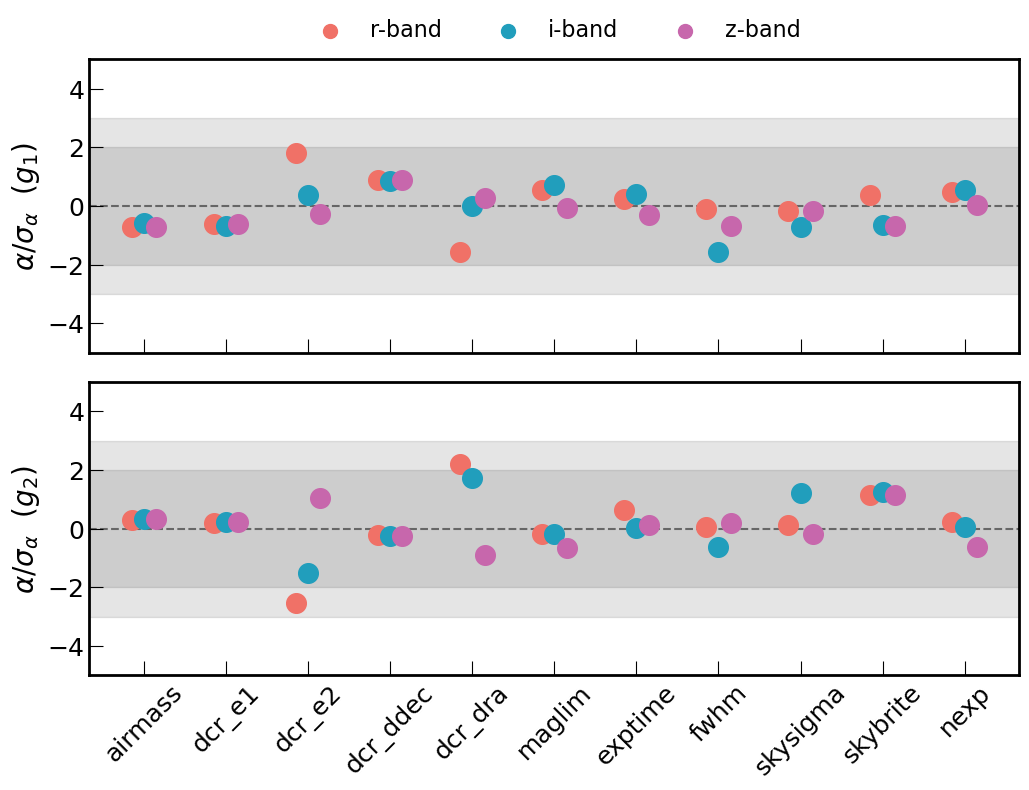

In [107]:
fig, ax = plt.subplots(2, 1, figsize = (12,8), sharex = True, sharey = True)
plt.subplots_adjust(hspace = 0.1)

bands = list(res['g1'].keys())
maps  = list(res['g1'][bands[0]].keys())

for a, d in zip(ax.flat, ['g1', 'g2']):
        
    for b_i in range(len(bands)):
        
        b = bands[b_i]
        for s_i in range(len(maps)):
            
            m = maps[s_i]
            
            s = np.std(res[d][b][m]) * np.sqrt(RUN.Npatch)
            m = np.average(res[d][b][m])

#             print(d, maps[s_i], bands[b_i], m, m/s)
            a.scatter(s_i + 0.15*(b_i - 1), m/s, s = 200, color = 'C%d' % b_i)
            
            
ax[0].legend([plt.scatter([], [], s = 100) for i in range(3)], ['r-band', 'i-band', 'z-band'],
             fontsize = 16, frameon = False, loc = 'center', bbox_to_anchor = (0.5, 1.1), ncol = 3)
ax[1].set_xticks(range(len(maps)), maps, rotation = 45, ha = 'center')

ax[0].set_ylabel(r'$\alpha/\sigma_\alpha \,\,\,\,(g_1)$', size = 20)
ax[1].set_ylabel(r'$\alpha/\sigma_\alpha \,\,\,\,(g_2)$', size = 20)
    
    
for a in ax.flat:
    a.axhline(0, alpha = 0.5, ls ='--', color = 'k', zorder = -100)
    a.axhspan(-2, 2, alpha = 0.1, color = 'k', zorder = -100)
    a.axhspan(-3, 3, alpha = 0.1, color = 'k', zorder = -100)
    a.set_ylim(-5, 5)
    
    
plt.savefig('./ShearSysRegression.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

# Plot spatially varying response

In [ ]:
RUN = SysmapTestRunner(NSIDE = 128, 
                       data_path = '/project/chihway/data/decade/metacal_gold_combined_20240209.hdf',)

In [17]:
g1, g2, N = RUN.get_data_maps()
R11, R22  = RUN.get_response_maps()

Function get_data_maps took 31.12 seconds to run.
FINISHED LOADING MASKS
FINISHED LOADING PIX
FINISHED LOADING SHEAR
Function _pix_avg took 1.2186 seconds to run.
Function _pix_avg took 1.2109 seconds to run.
Function _pix_avg took 1.2125 seconds to run.
Function _pix_avg took 1.2113 seconds to run.
Function _pix_avg took 1.2178 seconds to run.
Function _pix_avg took 1.2109 seconds to run.
Function _pix_avg took 1.224 seconds to run.
Function _pix_avg took 1.2108 seconds to run.
Function get_response_maps took 166.55 seconds to run.


In [18]:
M = hsp.HealSparseMap(healpix_map = np.where(N > 0, R11, hp.UNSEEN), nest = False, sentinel = 0., nside_coverage = 128, )

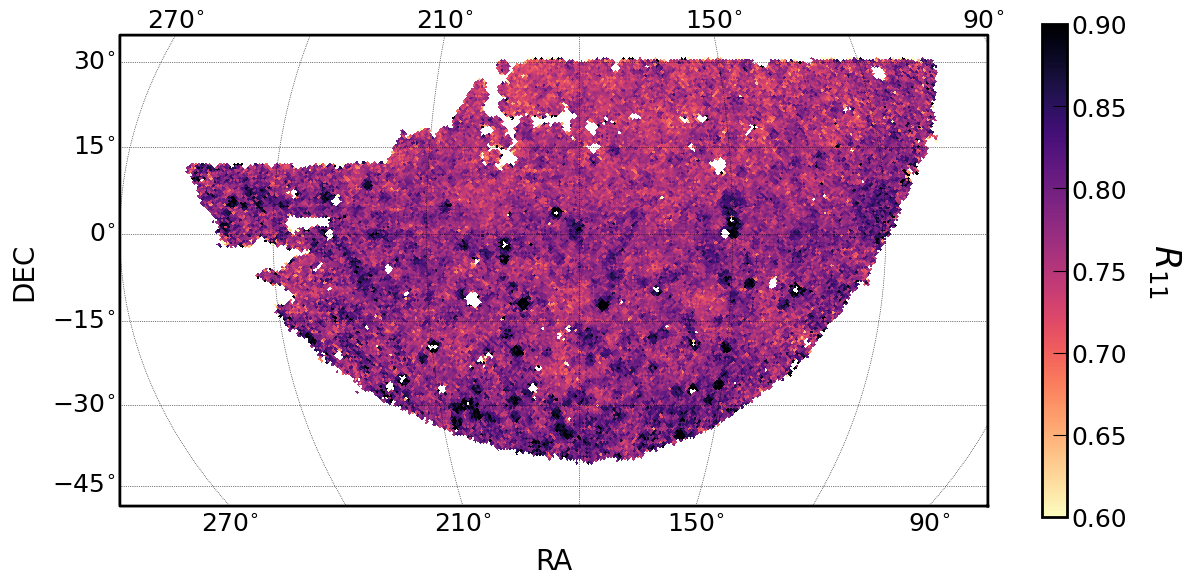

In [20]:
fig, ax = plt.subplots(1, 1, figsize = (14,8))
sp = skyproj.McBrydeSkyproj(ax = ax, lon_0 = 180, extent = [100, 270, -49, 35])
im = sp.draw_hspmap(M, cmap = 'magma_r', zoom = False, vmin = 0.6, vmax = 0.9, rasterized = True,)

c = plt.colorbar(im[0], fraction = 0.15, shrink = 0.8, aspect = 20)
c.set_label(label = r'$R_{11}$', rotation = 270, labelpad = 40, size = 25)
sp.set_ylabel('DEC', size = 20, pad = 10)
sp.set_xlabel('RA', size = 20, pad = 10)


plt.savefig('./ResponseMap.pdf', dpi = 300, bbox_inches = 'tight')

plt.show()

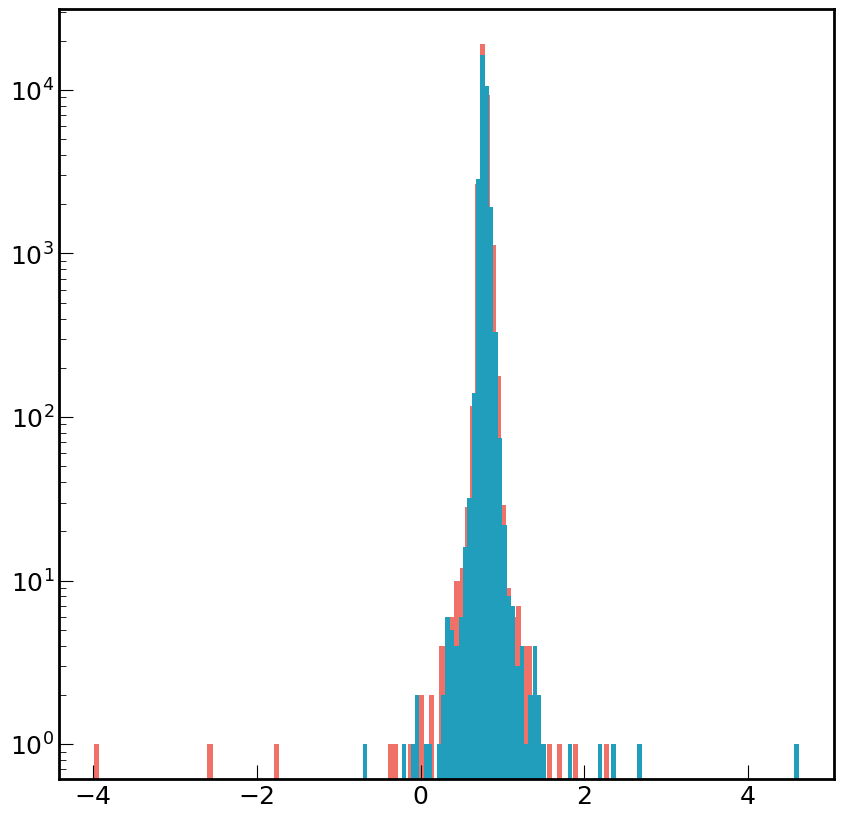

In [102]:
plt.hist(R11[N > 0], bins = 100, log = True);
plt.hist(R22[N > 0], bins = 100, log = True);